In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def h(x, alpha):
    return 1-x[0]**2-alpha*x[1]**2

def u_of_x(x, u_min, u_max, k=2.6, alpha=1):
    assert x.shape[0]==2, 'shape_error'
    assert u_min < u_max, f'input constraint error. {u_min} > {u_max}?'
    al = alpha
    m = 1
    l = 1
    g = 10.
    gamma = pow(10, k)
    th, thd = x
    if thd == 0:
        p = abs(m*g*np.sin(th)/2)
        ran = [u_min, -p] if th > 0 else [p, u_max]
    else:
        u_thres = np.roots([-(6*al*thd)/(m*l**2), -(2*th*thd + 3*al*g/l*thd*np.sin(th) - gamma*h(x, al))])[0]
        if thd < 0:
            u_thres = max(u_thres, u_min)
            ran = [u_thres, u_max]
        else:
            u_thres = min(u_thres, u_max)
            ran = [u_min, u_thres]
    return ran

def safe_action_existance(x, u_min, u_max, k=2.6, alpha=1):
    assert x.shape[0]==2, 'shape_error'
    assert u_min < u_max, f'input constraint error. {u_min} > {u_max}?'
    a = alpha
    m = 1
    l = 1
    g = 10.
    gamma = pow(10, k)
    th, thd = x
    u_thres = np.roots([-(6*a*thd)/(m*l**2), -(2*th*thd + 3*a*g/l*thd*np.sin(th) + gamma*(th**2+a*thd**2-1))])[0]
    if thd < 0:
        safe = 0 if u_thres > u_max else 1
    else:
        safe = 0 if u_thres < u_min else 1
    return safe

In [42]:
alpha = 2. # 大きいほど角速度重視

## $U(x)$が空集合とならない状態変数の領域を図示

In [43]:
region = []
for _ in range(10000):
    x = np.random.randn(2,)
    if safe_action_existance(x, -10., 10., alpha=alpha) > 0:
        region.append(x)

<IPython.core.display.Javascript object>


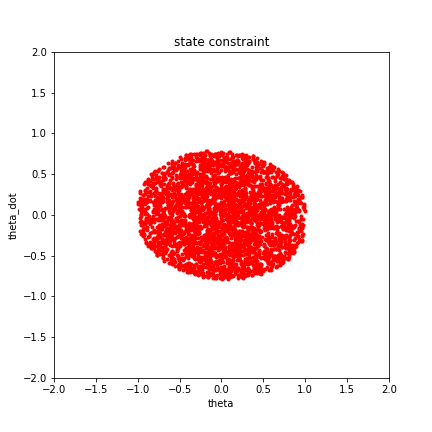

In [34]:
plt.figure(figsize=(6,6))
plt.xlabel('theta')
plt.ylabel('theta_dot')
plt.title('state constraint')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
re = np.array(region)
plt.scatter(re[:,0], re[:,1], color='red', marker='.')
plt.show()

## $h(x) \geq 0$となる領域の図示

In [47]:
# view region where h(x) >= 0
region = []
for _ in range(10000):
    x = np.random.randn(2,)
    if h(x, alpha) >= 0:
        region.append(x)

<IPython.core.display.Javascript object>


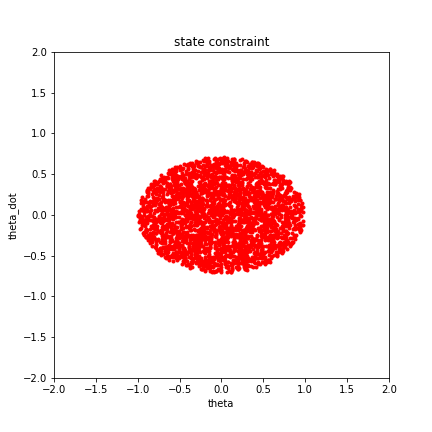

In [48]:
plt.figure(figsize=(6,6))
plt.xlabel('theta')
plt.ylabel('theta_dot')
plt.title('state constraint')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
re = np.array(region)
plt.scatter(re[:,0], re[:,1], color='red', marker='.')
plt.show()

In [49]:
# 領域のcsvへの書き込み
print(len(region))
import csv

re_csv = np.array(region)

with open('safe_region.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(re_csv)

2983


## 領域$C$で$U(x)$を図示する

In [45]:
# フチと中身とを良い感じに見たいのでそれぞれが1:1になるように配列を作る

region = np.array(region)
h_values = []

for p in region:
    h_values.append([h(p, alpha)])
h_values = np.array(h_values)
region_and_h = np.hstack((region, h_values))

region_and_h = region_and_h[np.argsort(region_and_h[:, 2])]

<IPython.core.display.Javascript object>


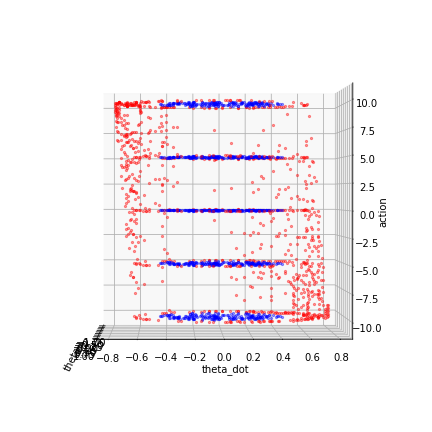

In [46]:
%matplotlib notebook

# フチと中身を両方
from mpl_toolkits.mplot3d import Axes3D
num = 400

re = np.vstack((region_and_h[np.random.permutation(np.arange(1000))[:int(num/2)], 0:2], \
                region_and_h[np.random.permutation(np.arange(2000, region.shape[0]))[:int(num/2)], 0:2]))

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.set_xlabel('theta')
ax.set_ylabel('theta_dot')
ax.set_zlabel('action')
for i, p in enumerate(re):
    ran = u_of_x(p, -10., 10., alpha=alpha)
    safe_actions = np.linspace(ran[0], ran[1], num=5)
    if i < int(num/2):
        col = 'red'
    else:
        col = 'blue'
    for a in safe_actions:
        ax.scatter3D(p[0], p[1], a, color=col, marker='.', alpha=0.4)
        
plt.show()

<IPython.core.display.Javascript object>


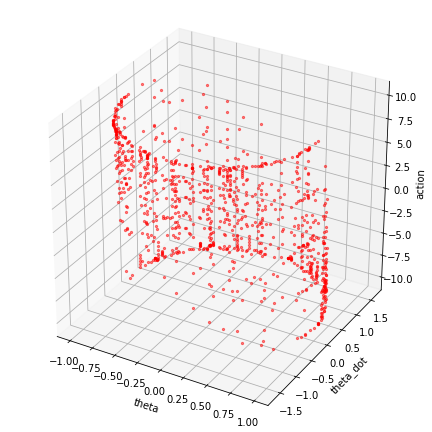

In [24]:
%matplotlib notebook

# フチだけ
from mpl_toolkits.mplot3d import Axes3D

re = region_and_h[np.random.permutation(np.arange(300))[:int(num/2)], 0:2]

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.set_xlabel('theta')
ax.set_ylabel('theta_dot')
ax.set_zlabel('action')
for i, p in enumerate(re):
    ran = u_of_x(p, -10., 10., alpha=alpha)
    safe_actions = np.linspace(ran[0], ran[1], num=5)
    for a in safe_actions:
        ax.scatter3D(p[0], p[1], a, color='red', marker='.', alpha=0.5)
        
plt.show()

<IPython.core.display.Javascript object>


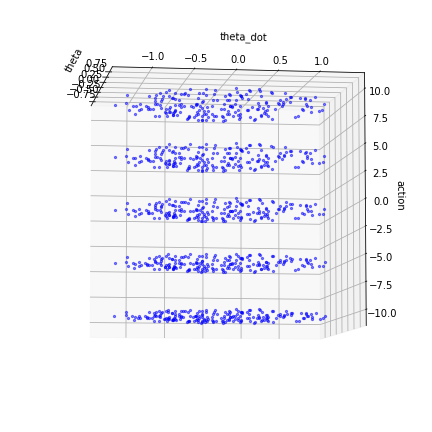

In [25]:
%matplotlib notebook

# 中身だけ
from mpl_toolkits.mplot3d import Axes3D

re = region_and_h[np.random.permutation(np.arange(1000, region.shape[0]))[:int(num/2)], 0:2]

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.set_xlabel('theta')
ax.set_ylabel('theta_dot')
ax.set_zlabel('action')
for i, p in enumerate(re):
    ran = u_of_x(p, -10., 10., alpha=alpha)
    safe_actions = np.linspace(ran[0], ran[1], num=5)
    for a in safe_actions:
        ax.scatter3D(p[0], p[1], a, color='blue', marker='.', alpha=0.5)
        
plt.show()

## 淵での$U(x)$どうなってる？

In [18]:
edge = region_and_h[np.random.randint(0, 300, int(num/2)), 0:2]

edge = edge[np.argsort(edge[:, 0])]

for p in edge:
    print(p, u_of_x(p, -10., 10., alpha=alpha))

[-0.99541893  0.09213043] [-10.0, 10.0]
[-0.99252887 -0.16474588] [0.9565110499653394, 10.0]
[-0.98863393 -0.08674161] [-10.0, 10.0]
[-0.98506601 -0.22219848] [-2.4003042006428967, 10.0]
[-0.98084086  0.3842662 ] [-10.0, -4.141755702229388]
[-0.97811923  0.28778237] [-10.0, 10.0]
[-0.97765995  0.16941641] [-10.0, 10.0]
[-0.97089524 -0.30538635] [-5.959005113237587, 10.0]
[-0.97089524 -0.30538635] [-5.959005113237587, 10.0]
[-0.96509622  0.54089764] [-10.0, -9.940049309748705]
[-0.96238256  0.52753276] [-10.0, -6.88568016492866]
[-0.96121591 -0.34634835] [-8.548536249736507, 10.0]
[-0.96070365  0.48552996] [-10.0, -0.9938374057190832]
[-0.96070365  0.48552996] [-10.0, -0.9938374057190832]
[-0.95258733  0.51447155] [-10.0, 0.5817779799770461]
[-0.94724871 -0.45399856] [-2.559104043270809, 10.0]
[-0.94724871 -0.45399856] [-2.559104043270809, 10.0]
[-0.94724871 -0.45399856] [-2.559104043270809, 10.0]
[-0.94639014 -0.51587128] [5.521611285581551, 10.0]
[-0.94639014 -0.51587128] [5.521611285